In [1]:
import pandas as pd
import numpy as np

In [132]:
df=pd.read_csv("solar_hourly.csv")
df["day"]=df["date"].apply(lambda x:x.split("T")[0])
display(df)

,Unnamed: 0,date,month,day,H,M,alt,az
0,0,2022-01-01T00:00:00,1,2022-01-01,0,0,-62.273617,31.008565
1,1,2022-01-01T00:01:00,1,2022-01-01,0,1,-62.362717,31.486848
2,2,2022-01-01T00:02:00,1,2022-01-01,0,2,-62.453034,31.962462
3,3,2022-01-01T00:03:00,1,2022-01-01,0,3,-62.544557,32.435400
4,4,2022-01-01T00:04:00,1,2022-01-01,0,4,-62.637272,32.905653
...,...,...,...,...,...,...,...,...
503695,503695,2022-12-31T22:55:00,12,2022-12-31,22,55,-65.619183,355.701618
503696,503696,2022-12-31T22:56:00,12,2022-12-31,22,56,-65.607229,356.274959
503697,503697,2022-12-31T22:57:00,12,2022-12-31,22,57,-65.596989,356.848761
503698,503698,2022-12-31T22:58:00,12,2022-12-31,22,58,-65.588466,357.422953


$\frac{sin(\alpha)cos(\beta)+cos(\alpha)*cos(\gamma_S-\gamma)*sin(\beta)}{sin(\alpha)}$

In [125]:
beta=90
gama_s=180

def d2r(x):
    return np.deg2rad(x)

def f_vzhod(alfa,beta):
    s1=np.sin(d2r(alfa))*np.cos(d2r(beta))
    if (s1<0 or beta<0):
        s1=0
    return (s1)#/np.sin(d2r(alfa))

def f_jug(alfa,beta):
    s1=np.cos(d2r(alfa-180))*np.cos(d2r(beta))
    if (s1<0 or beta<0):
        s1=0
    return (s1)#/np.sin(d2r(alfa))

def f_zahod(alfa,beta):
    s1=np.sin(d2r(alfa)+180)*np.cos(d2r(beta))
    if (s1<0 or beta<0):
        s1=0
    return (s1)#/np.sin(d2r(alfa))

def f_gori(alfa,beta):
    s1=np.cos(d2r(beta-90))
    if s1<0:
        s1=0
    return (s1)#/np.sin(d2r(alfa))

def f(alfa,beta):
    return [f_vzhod(alfa,beta),f_jug(alfa,beta),f_zahod(alfa,beta),f_gori(alfa,beta)]

In [143]:
beta=90
gama_s=180
r1=[]
r2=[]
r3=[]
r4=[]
r5=[]
day=24*60
for i,ii in df[df["day"]=="2022-02-08"].iterrows():
    print(ii["date"],"%.2f"%ii["az"],"%.2f"%ii["alt"],["%.2f"%k for k in r])
    r=f(ii["az"],ii["alt"])
    r1.append(r[0])
    r2.append(r[1])
    r3.append(r[2])
    r4.append(r[3])

2022-02-08T00:00:00 20.96 -55.01 ['0.00', '0.00', '0.00', '0.00']
2022-02-08T00:01:00 21.38 -55.07 ['0.00', '0.00', '0.00', '0.00']
2022-02-08T00:02:00 21.81 -55.14 ['0.00', '0.00', '0.00', '0.00']
2022-02-08T00:03:00 22.24 -55.20 ['0.00', '0.00', '0.00', '0.00']
2022-02-08T00:04:00 22.66 -55.27 ['0.00', '0.00', '0.00', '0.00']
2022-02-08T00:05:00 23.08 -55.33 ['0.00', '0.00', '0.00', '0.00']
2022-02-08T00:06:00 23.50 -55.40 ['0.00', '0.00', '0.00', '0.00']
2022-02-08T00:07:00 23.92 -55.47 ['0.00', '0.00', '0.00', '0.00']
2022-02-08T00:08:00 24.34 -55.54 ['0.00', '0.00', '0.00', '0.00']
2022-02-08T00:09:00 24.76 -55.61 ['0.00', '0.00', '0.00', '0.00']
2022-02-08T00:10:00 25.17 -55.69 ['0.00', '0.00', '0.00', '0.00']
2022-02-08T00:11:00 25.59 -55.76 ['0.00', '0.00', '0.00', '0.00']
2022-02-08T00:12:00 26.00 -55.83 ['0.00', '0.00', '0.00', '0.00']
2022-02-08T00:13:00 26.41 -55.91 ['0.00', '0.00', '0.00', '0.00']
2022-02-08T00:14:00 26.82 -55.99 ['0.00', '0.00', '0.00', '0.00']
2022-02-08

2022-02-08T09:37:00 154.24 24.73 ['0.40', '0.82', '0.42', '0.42']
2022-02-08T09:38:00 154.49 24.81 ['0.39', '0.82', '0.42', '0.42']
2022-02-08T09:39:00 154.75 24.88 ['0.39', '0.82', '0.42', '0.42']
2022-02-08T09:40:00 155.00 24.95 ['0.39', '0.82', '0.43', '0.42']
2022-02-08T09:41:00 155.26 25.02 ['0.38', '0.82', '0.43', '0.42']
2022-02-08T09:42:00 155.51 25.10 ['0.38', '0.82', '0.43', '0.42']
2022-02-08T09:43:00 155.77 25.17 ['0.38', '0.82', '0.44', '0.42']
2022-02-08T09:44:00 156.02 25.24 ['0.37', '0.83', '0.44', '0.43']
2022-02-08T09:45:00 156.28 25.31 ['0.37', '0.83', '0.44', '0.43']
2022-02-08T09:46:00 156.53 25.38 ['0.36', '0.83', '0.45', '0.43']
2022-02-08T09:47:00 156.79 25.44 ['0.36', '0.83', '0.45', '0.43']
2022-02-08T09:48:00 157.05 25.51 ['0.36', '0.83', '0.45', '0.43']
2022-02-08T09:49:00 157.30 25.58 ['0.35', '0.83', '0.46', '0.43']
2022-02-08T09:50:00 157.56 25.65 ['0.35', '0.83', '0.46', '0.43']
2022-02-08T09:51:00 157.82 25.71 ['0.34', '0.83', '0.46', '0.43']
2022-02-08

2022-02-08T19:44:00 288.32 -35.75 ['0.00', '0.00', '0.00', '0.00']
2022-02-08T19:45:00 288.54 -35.59 ['0.00', '0.00', '0.00', '0.00']
2022-02-08T19:46:00 288.76 -35.43 ['0.00', '0.00', '0.00', '0.00']
2022-02-08T19:47:00 288.99 -35.27 ['0.00', '0.00', '0.00', '0.00']
2022-02-08T19:48:00 289.21 -35.10 ['0.00', '0.00', '0.00', '0.00']
2022-02-08T19:49:00 289.44 -36.94 ['0.00', '0.00', '0.00', '0.00']
2022-02-08T19:50:00 289.66 -36.78 ['0.00', '0.00', '0.00', '0.00']
2022-02-08T19:51:00 289.89 -36.62 ['0.00', '0.00', '0.00', '0.00']
2022-02-08T19:52:00 290.11 -36.46 ['0.00', '0.00', '0.00', '0.00']
2022-02-08T19:53:00 290.34 -36.30 ['0.00', '0.00', '0.00', '0.00']
2022-02-08T19:54:00 290.57 -36.14 ['0.00', '0.00', '0.00', '0.00']
2022-02-08T19:55:00 290.80 -37.98 ['0.00', '0.00', '0.00', '0.00']
2022-02-08T19:56:00 291.03 -37.82 ['0.00', '0.00', '0.00', '0.00']
2022-02-08T19:57:00 291.26 -37.66 ['0.00', '0.00', '0.00', '0.00']
2022-02-08T19:58:00 291.49 -37.50 ['0.00', '0.00', '0.00', '0.

1380


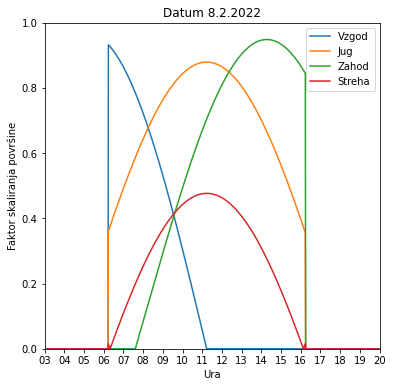

In [145]:
print(len(r1))
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
plt.title("Datum 8.2.2022")
plt.plot(r1,label="Vzgod")
plt.plot(r2,label="Jug")
plt.plot(r3,label="Zahod")
plt.plot(r4,label="Streha")
plt.ylim(0,1)
plt.xticks([i for i in range(0,len(r1),60)],["%02d"%int(i/60) for i in range(0,len(r1),60)])
plt.legend()
plt.ylabel("Faktor skaliranja površine")
plt.xlim(3*60,20*60)
plt.xlabel("Ura")
plt.show()

In [146]:
df_1h=pd.read_csv("df_1h.csv")
display(df_1h)

,Unnamed: 0,date,time,azi,alt,I0,Id,Rd
0,0,2022-01-01,0.0,31.008565,-59.495037,1.497366,0.0,0.0
1,1,2022-01-01,1.0,55.109226,-51.246202,1.497298,0.0,0.0
2,2,2022-01-01,2.0,71.927517,-41.495508,1.497231,0.0,0.0
3,3,2022-01-01,3.0,84.753101,-31.280969,1.497163,0.0,0.0
4,4,2022-01-01,4.0,95.654162,-21.040521,1.497095,0.0,0.0
...,...,...,...,...,...,...,...,...
8390,8390,2022-12-31,18.0,263.426057,-30.256571,1.516962,0.0,0.0
8391,8391,2022-12-31,19.0,274.227333,-40.489044,1.516924,0.0,0.0
8392,8392,2022-12-31,20.0,286.828179,-50.292938,1.516887,0.0,0.0
8393,8393,2022-12-31,21.0,303.199898,-58.767179,1.516849,0.0,0.0


In [166]:
r1=[]
r2=[]
r3=[]
r4=[]
r5=[]
for i,ii in df_1h[df_1h["date"]=="2022-06-25"].iterrows():
    print(ii["date"],"%.2f"%ii["azi"],"%.2f"%ii["alt"],["%.2f"%k for k in r],ii["Rd"])
    r=f(ii["azi"],ii["alt"])
    r1.append(r[0]*ii["Rd"])
    r2.append(r[1]*ii["Rd"])
    r3.append(r[2]*ii["Rd"])
    r4.append(r[3]*ii["Rd"])

2022-06-25 14.07 -16.15 ['0.00', '0.00', '0.00', '0.00'] 0.0
2022-06-25 27.93 -11.32 ['0.00', '0.00', '0.00', '0.00'] 0.0
2022-06-25 40.70 -4.76 ['0.00', '0.00', '0.00', '0.00'] 0.0
2022-06-25 52.31 2.62 ['0.00', '0.00', '0.00', '0.00'] 0.0
2022-06-25 63.00 11.54 ['0.79', '0.00', '0.00', '0.05'] 0.08388046698579596
2022-06-25 73.13 21.37 ['0.87', '0.00', '0.00', '0.20'] 0.19792635842192136
2022-06-25 83.23 31.57 ['0.89', '0.00', '0.00', '0.36'] 0.31959994626522265
2022-06-25 94.01 41.81 ['0.85', '0.00', '0.00', '0.52'] 0.4341028088323684
2022-06-25 106.59 51.62 ['0.74', '0.05', '0.00', '0.67'] 0.5303397985862014
2022-06-25 122.98 60.14 ['0.60', '0.18', '0.00', '0.78'] 0.5997568752981853
2022-06-25 146.48 65.63 ['0.42', '0.27', '0.00', '0.87'] 0.6365206086339478
2022-06-25 178.84 65.88 ['0.23', '0.34', '0.14', '0.91'] 0.6380419156927087
2022-06-25 211.62 60.74 ['0.01', '0.41', '0.32', '0.91'] 0.6042388400700199
2022-06-25 235.72 52.39 ['0.00', '0.42', '0.49', '0.87'] 0.5374374978360991


23


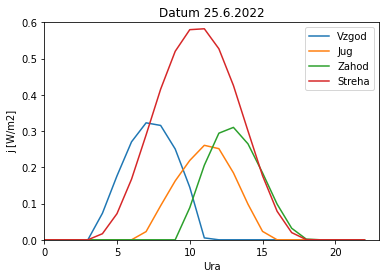

In [167]:
print(len(r1))
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.title("Datum 25.6.2022")
#plt.title("Datum 8.2.2022")
plt.plot(r1,label="Vzgod")
plt.plot(r2,label="Jug")
plt.plot(r3,label="Zahod")
plt.plot(r4,label="Streha")

#plt.xticks([i for i in range(0,len(r1),60)],["%02d"%int(i/60) for i in range(0,len(r1),60)])
plt.legend()
plt.ylabel("j [W/m2]")
plt.xlabel("Ura")
plt.ylim(0,0.6)
plt.xlim(0,23)
plt.show()